In [2]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Импорт данных

In [3]:
segment_directory = "data/segmentation.csv"
parse_dates = ['Recency']
segment = pd.read_csv(segment_directory, header=0, parse_dates=parse_dates )


In [4]:
segment.count()

CustomerId    16000
Monetary      16000
Recency       16000
Frequency     16000
factor_1      16000
factor_2      16000
factor_3      16000
factor_4      16000
dtype: int64

### Удаляем столбец CustomerId

In [5]:
segment = segment.drop('CustomerId', 1)

### Приводим Recency к Int как разница между самым поздним днем и текущим

In [6]:
max_Recency = max(segment['Recency'])

In [7]:
segment['Recency'] = max_Recency - segment['Recency']

In [8]:
for i in range(len(segment['Recency'])):
    segment.loc[i, 'Recency'] = int(segment.loc[i, 'Recency'].days)

In [9]:
segment['Recency'] = segment['Recency'].astype(int)

In [10]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   16000 non-null  float64
 1   Recency    16000 non-null  int32  
 2   Frequency  16000 non-null  int64  
 3   factor_1   16000 non-null  float64
 4   factor_2   16000 non-null  float64
 5   factor_3   16000 non-null  float64
 6   factor_4   16000 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 812.6 KB


In [63]:
segment.describe()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,129.972264,58.882688,3.950687,0.500008,0.497864,0.495451,0.498427
std,179.809263,51.236764,5.189864,0.290144,0.291103,0.289034,0.288478
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000037,0.000033
25%,20.910000,8.000000,1.000000,0.250000,0.240000,0.242545,0.248739
50%,59.275000,50.000000,2.000000,0.500000,0.500000,0.496410,0.498833
75%,170.000000,93.000000,5.000000,0.750000,0.750000,0.744476,0.747424
max,3040.000000,166.000000,111.000000,1.000000,1.000000,0.999996,0.999943


### Нормализация данных (т.к. данные разных порядков)

In [49]:
scaler = StandardScaler().fit(segment)
segmentScaled = scaler.transform(segment)

### Определение количества кластеров

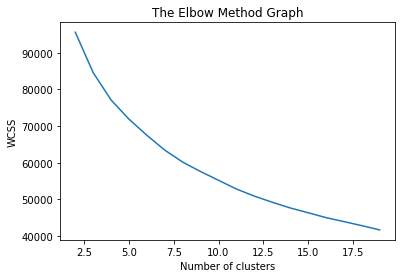

In [12]:
wcss=[]
scores=[]
for i in range(2,20): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=50,random_state=0 )
    kmeans.fit(segmentScaled)
    wcss.append(kmeans.inertia_)    
    scores.append(metrics.calinski_harabasz_score(segmentScaled, kmeans.labels_))
plt.plot(range(2,20),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [137]:
for i in range(len(scores)):
    print('\n' + str(i+2) +" : "+str(scores[i]))


2 : 17731.271872699417

3 : 8679.531701678296

4 : 5071.835223399015

5 : 3590.5274690917327

6 : 2726.553782526286

7 : 4554.445449711171

8 : 3629.67196732764

9 : 3079.606426377765

10 : 2593.7685524034514

11 : 2217.703119494535

12 : 1814.0859573590212

13 : 2258.6980476072213

14 : 2104.4698208003165

15 : 1925.9592972053465

16 : 1818.2526579693251

17 : 1699.5460072344717

18 : 1588.878078151015

19 : 1474.2820176604753


### Оптимальное количество кластеров -> 4-5
#### Корреляция признаков с Monetary:

In [28]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,1])

array([[ 1.        , -0.25863251],
       [-0.25863251,  1.        ]])

In [29]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,2])

array([[1.        , 0.70499399],
       [0.70499399, 1.        ]])

In [30]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,3])

array([[ 1.        , -0.00326681],
       [-0.00326681,  1.        ]])

In [31]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,4])

array([[1.00000000e+00, 2.69262106e-04],
       [2.69262106e-04, 1.00000000e+00]])

In [32]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,5])

array([[ 1.        , -0.00469313],
       [-0.00469313,  1.        ]])

In [33]:
np.corrcoef(segmentScaled[:,0],segmentScaled[:,6])

array([[1.        , 0.00196208],
       [0.00196208, 1.        ]])

In [101]:
segment.corr().style.background_gradient(cmap='coolwarm')#segmentScaled

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
Monetary,1.000000,-0.258633,0.704994,-0.003267,0.000269,-0.004693,0.001962
Recency,-0.258633,1.000000,-0.250237,0.002042,-0.008931,0.012122,-0.001852
Frequency,0.704994,-0.250237,1.000000,0.000180,-0.000392,0.006420,0.005112
factor_1,-0.003267,0.002042,0.000180,1.000000,-0.005630,-0.000411,-0.011337
factor_2,0.000269,-0.008931,-0.000392,-0.005630,1.000000,0.006977,0.011048
factor_3,-0.004693,0.012122,0.006420,-0.000411,0.006977,1.000000,-0.003524
factor_4,0.001962,-0.001852,0.005112,-0.011337,0.011048,-0.003524,1.000000


### Обучение на 5 кластерах методом KMeans

In [35]:
kmeans = KMeans(n_clusters=5, init ='k-means++', n_init=50, random_state=0).fit(segmentScaled)

In [36]:
y_kmeans = kmeans.fit_predict(segmentScaled)

In [37]:
kmeans.labels_

array([4, 4, 4, ..., 3, 3, 1])

In [38]:
def showplot(segment, first_feature, second_feature):
    plt.scatter(segment[y_kmeans==0][first_feature], segment[y_kmeans==0][second_feature], s=1, c='red', label ='Cluster 1')
    plt.scatter(segment[y_kmeans==1][first_feature], segment[y_kmeans==1][second_feature], s=1, c='blue', label ='Cluster 2')
    plt.scatter(segment[y_kmeans==2][first_feature], segment[y_kmeans==2][second_feature], s=1, c='green', label ='Cluster 3')
    plt.scatter(segment[y_kmeans==3][first_feature], segment[y_kmeans==3][second_feature], s=1, c='cyan', label ='Cluster 4')
    plt.scatter(segment[y_kmeans==4][first_feature], segment[y_kmeans==4][second_feature], s=1, c='magenta', label ='Cluster 5')
    plt.scatter(segment[y_kmeans==5][first_feature], segment[y_kmeans==5][second_feature], s=1, c='gray', label ='Cluster 6')
    plt.scatter(segment[y_kmeans==6][first_feature], segment[y_kmeans==6][second_feature], s=1, c='black', label ='Cluster 7')
    plt.legend()
    plt.show()

In [39]:
def shownormplot(segmentScaled, first_feature, second_feature):
    plt.scatter(segmentScaled[y_kmeans==0, first_feature], segmentScaled[y_kmeans==0, second_feature], s=1, c='red', label ='Cluster 1')
    plt.scatter(segmentScaled[y_kmeans==1, first_feature], segmentScaled[y_kmeans==1, second_feature], s=1, c='blue', label ='Cluster 2')
    plt.scatter(segmentScaled[y_kmeans==2, first_feature], segmentScaled[y_kmeans==2, second_feature], s=1, c='green', label ='Cluster 3')
    plt.scatter(segmentScaled[y_kmeans==3, first_feature], segmentScaled[y_kmeans==3, second_feature], s=1, c='cyan', label ='Cluster 4')
    plt.scatter(segmentScaled[y_kmeans==4, first_feature], segmentScaled[y_kmeans==4, second_feature], s=1, c='magenta', label ='Cluster 5')
    plt.scatter(segmentScaled[y_kmeans==5, first_feature], segmentScaled[y_kmeans==5, second_feature], s=1, c='gray', label ='Cluster 6')
    plt.scatter(segmentScaled[y_kmeans==6, first_feature], segmentScaled[y_kmeans==6, second_feature], s=1, c='black', label ='Cluster 7')
    plt.legend()
    plt.show()

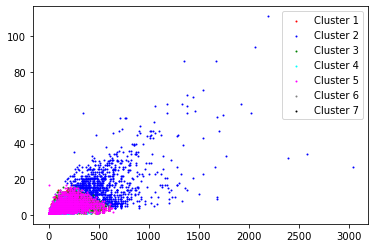

In [40]:
showplot(segment, 'Monetary', 'Frequency')

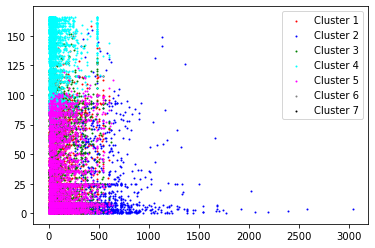

In [41]:
showplot(segment, 'Monetary', 'Recency')

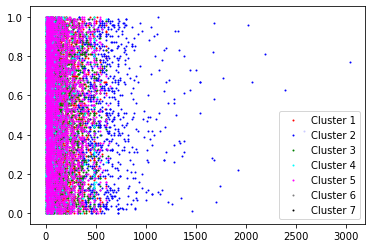

In [42]:
showplot(segment, 'Monetary', 'factor_1')

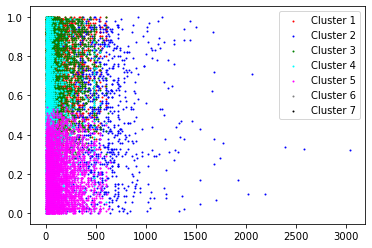

In [43]:
showplot(segment, 'Monetary', 'factor_2')

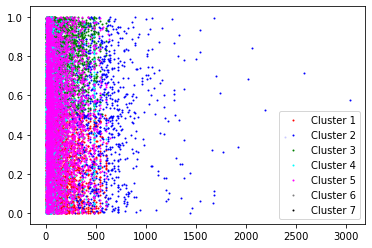

In [45]:
showplot(segment, 'Monetary', 'factor_3')

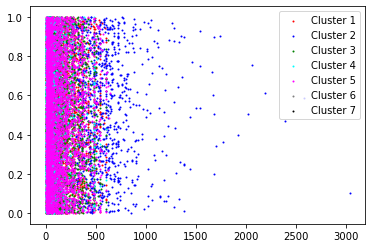

In [46]:
showplot(segment, 'Monetary', 'factor_4')

### В ходе обучения на 5 кластерах, а также на количестве кластеров от 2 до 7 было выявлено:
#### Отсутствие влияния факторов 1,2,3,4 при количестве кластеров 2-3
#### Высокое влияние фактора 3 и почти отсутствие влияния каких-либо других факторов при количестве кластеров 4
#### Высокое влияние фактора 2 и среднее влияние фактора 3 при количестве кластеров = 5
#### Высокое влияние факторов 1,3 и среднее влияние фактора 2 при количестве кластеров = 6
#### Высокое влияние факторов 2,3 и отсуствие влияния факторов 1,4 при количестве кластеров = 7
### Оценка производилась по графикам построенным выше для каждого количества кластеров. Высоким влиянием признавалось явное разграничение кластеров по оси Y (оси фактора), низким влиянием или отсутствием влияния признавалось отсутствие явного разграничения кластеров по оси Y (каждый кластер принимал значения [0, 1]), что представлялось как шум на графике
## В виду чего факторами, не оказывающими влияния признаются факторы factor_1, factor_4

# Средние значения факторов по разным кластерам:

## Нормализованные:

In [54]:
kmeans.cluster_centers_

array([[-8.08902357e-02, -4.03588429e-01, -1.06219687e-01,
        -2.25352849e-02,  7.43094702e-01, -9.18937662e-01,
         5.63362365e-02],
       [ 2.64796045e+00, -6.73660446e-01,  2.76900049e+00,
        -1.21497640e-02,  1.64728705e-02,  2.36859036e-02,
         5.72625051e-02],
       [-1.18603902e-01, -2.67175858e-01, -1.24684693e-01,
        -4.61654992e-02,  6.92618312e-01,  1.00061959e+00,
        -3.07707853e-02],
       [-4.34537441e-01,  1.37587295e+00, -4.15119606e-01,
         1.79319659e-02, -2.06077498e-01, -6.42426542e-02,
         2.22507378e-03],
       [-3.53607377e-02, -5.22295049e-01, -5.36364917e-02,
         4.62092286e-02, -1.06334725e+00, -2.58053907e-02,
        -3.70170908e-02]])

In [59]:
df_norm = pd.DataFrame(kmeans.cluster_centers_, columns=['Monetary','Recency', 'Frequency','factor_1','factor_2','factor_3','factor_4'],
                      index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [60]:
df_norm

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
Cluster 1,-0.080890,-0.403588,-0.106220,-0.022535,0.743095,-0.918938,0.056336
Cluster 2,2.647960,-0.673660,2.769000,-0.012150,0.016473,0.023686,0.057263
Cluster 3,-0.118604,-0.267176,-0.124685,-0.046165,0.692618,1.000620,-0.030771
Cluster 4,-0.434537,1.375873,-0.415120,0.017932,-0.206077,-0.064243,0.002225
Cluster 5,-0.035361,-0.522295,-0.053636,0.046209,-1.063347,-0.025805,-0.037017


## Денормализованные:

In [51]:
test = scaler.inverse_transform(kmeans.cluster_centers_)

In [52]:
test

array([[1.15427905e+02, 3.82047686e+01, 3.39943899e+00, 4.93469846e-01,
        7.14173913e-01, 2.29854503e-01, 5.14678174e-01],
       [6.06085201e+02, 2.43675847e+01, 1.83209746e+01, 4.96483051e-01,
        5.02658898e-01, 5.02296522e-01, 5.14945374e-01],
       [1.08646850e+02, 4.51938889e+01, 3.30361111e+00, 4.86613889e-01,
        6.99480556e-01, 7.84655034e-01, 4.89550488e-01],
       [5.18408486e+01, 1.29375762e+02, 1.79634049e+00, 5.05210819e-01,
        4.37875895e-01, 4.76882948e-01, 4.99068775e-01],
       [1.23614274e+02, 3.21228155e+01, 3.67233010e+00, 5.13415049e-01,
        1.88330097e-01, 4.87992288e-01, 4.87748622e-01]])

In [61]:
df_denorm = pd.DataFrame(test, columns=['Monetary','Recency', 'Frequency','factor_1','factor_2','factor_3','factor_4'],
                      index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [62]:
df_denorm

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
Cluster 1,115.427905,38.204769,3.399439,0.493470,0.714174,0.229855,0.514678
Cluster 2,606.085201,24.367585,18.320975,0.496483,0.502659,0.502297,0.514945
Cluster 3,108.646850,45.193889,3.303611,0.486614,0.699481,0.784655,0.489550
Cluster 4,51.840849,129.375762,1.796340,0.505211,0.437876,0.476883,0.499069
Cluster 5,123.614274,32.122816,3.672330,0.513415,0.188330,0.487992,0.487749


In [64]:
segment.describe()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,129.972264,58.882688,3.950687,0.500008,0.497864,0.495451,0.498427
std,179.809263,51.236764,5.189864,0.290144,0.291103,0.289034,0.288478
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000037,0.000033
25%,20.910000,8.000000,1.000000,0.250000,0.240000,0.242545,0.248739
50%,59.275000,50.000000,2.000000,0.500000,0.500000,0.496410,0.498833
75%,170.000000,93.000000,5.000000,0.750000,0.750000,0.744476,0.747424
max,3040.000000,166.000000,111.000000,1.000000,1.000000,0.999996,0.999943


# Описание кластеров
### В описании factor_1, factor_4 будут опущены как незначащие

### Cluster 1:
#### Пользователи, приносящие примерно среднее количество средств - (Monetary ~ 115) со средней частотой - (Frequency ~ 3.4), у которых время последнего платежа больше 5 недель назад. Значение factor_2 для данного кластера максимальное среди всех кластеров, в то время как factor_3 - минимальное. Данный профиль пользователя можно отнести к "обыкновенным пользователям", которые приносят средний доход (скрытые факторы должны быть расшифрованы, чтобы иметь более четкую информацию)

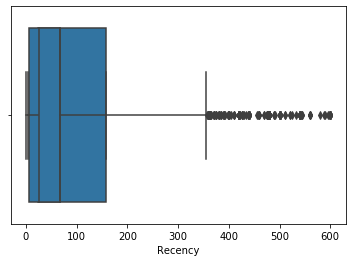

In [68]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==0]['Monetary'])

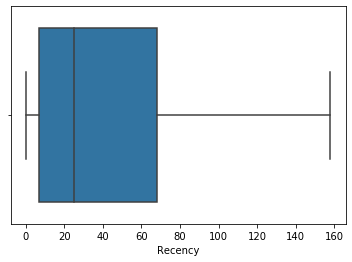

In [69]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==0]['Recency'])

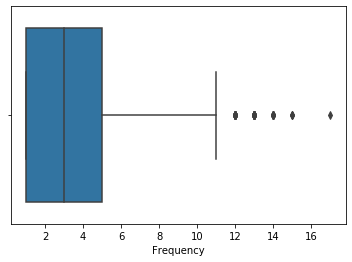

In [70]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==0]['Frequency'])

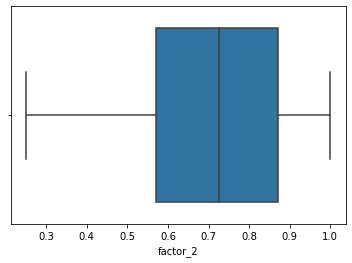

In [72]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==0]['factor_2'])

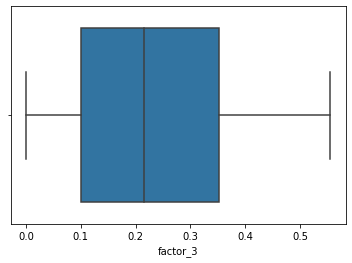

In [73]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==0]['factor_3'])

### Cluster 2:
#### Пользователи, приносящие наибольшее количество средств (Monetary ~ 606) с очень высокой частотой - (Frequency ~ 18), у которых время последнего платежа меньше 4 недель назад. Значение factor_2 и factor_3 для данного кластера примерно равны и составляют почти ровно 0,5. Данный кластер как раз описывает пользователей, приносящих наибольшее количество средств в продукт.

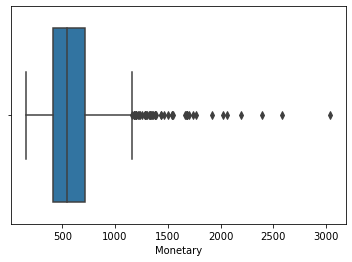

In [74]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==1]['Monetary'])

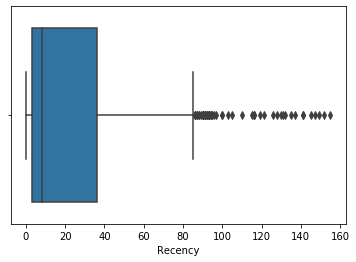

In [75]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==1]['Recency'])

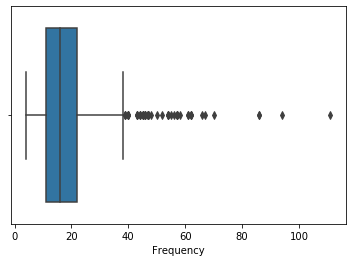

In [76]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==1]['Frequency'])

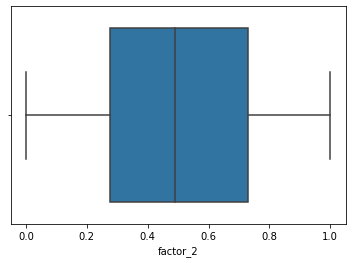

In [77]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==1]['factor_2'])

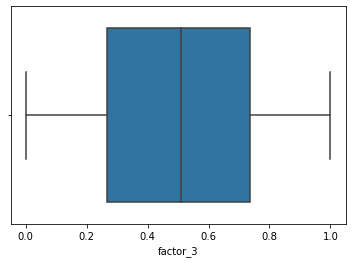

In [78]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==1]['factor_3'])

### Cluster 3:
#### Пользователи, приносящие немного ниже среднего количества средств - (Monetary ~ 108) со средней частотой - (Frequency ~ 3.3), у которых время последнего платежа больше 6 недель назад. Значение factor_2 для данного кластера почти максимальное (0,7) , а factor_3 - полностью максимальное (0.78). Данный профиль пользователя можно отнести к "обыкновенным пользователям", которые приносят средний доход (скрытые факторы должны быть расшифрованы, чтобы иметь более четкую информацию)

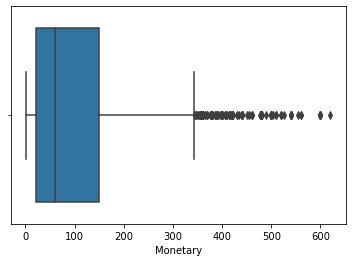

In [81]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==2]['Monetary'])

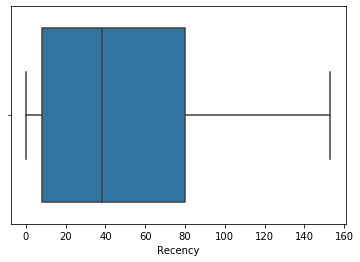

In [82]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==2]['Recency'])

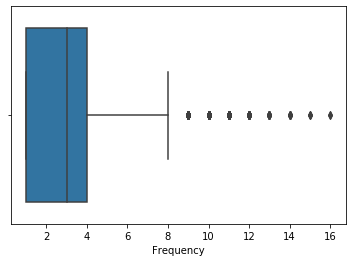

In [83]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==2]['Frequency'])

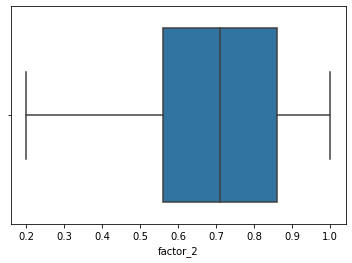

In [84]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==2]['factor_2'])

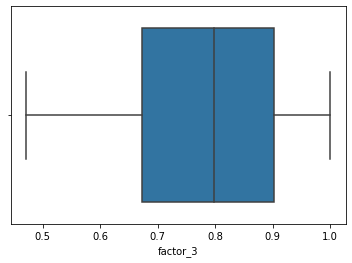

In [85]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==2]['factor_3'])

### Cluster 4:
#### Пользователи, приносящие минимальное количество средств - (Monetary ~ 52) с минимальной частотой - (Frequency ~ 1.8), у которых время последнего платежа больше 4 месяцев назад. Значение factor_2 для данного кластера чуть ниже среднего (0,44), как и factor_3 (0.48). Данный профиль пользователя можно отнести к "пользователям, которые не очень охотно платят", приносящие наименьший доход (скрытые факторы должны быть расшифрованы, чтобы иметь более четкую информацию)

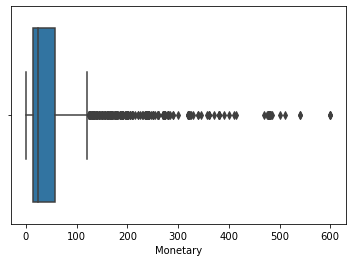

In [86]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==3]['Monetary'])

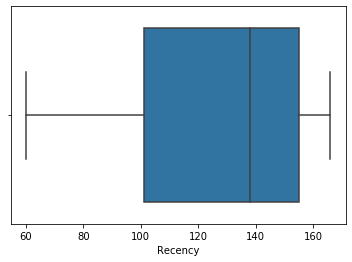

In [87]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==3]['Recency'])

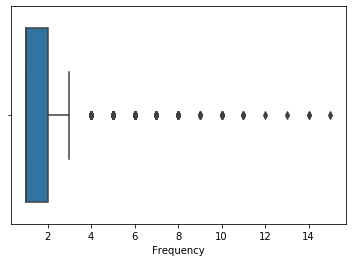

In [88]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==3]['Frequency'])

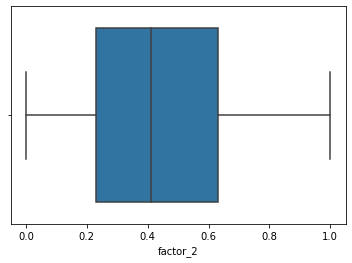

In [90]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==3]['factor_2'])

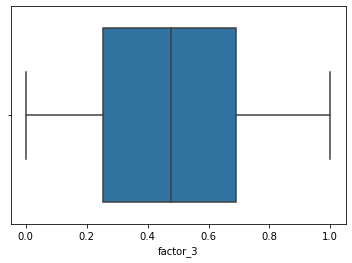

In [91]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==3]['factor_3'])

### Cluster 5:
#### Пользователи, приносящие чуть выше среднего количества средств (выше, чем кластеры 1,3,4) - (Monetary ~ 123) с немного более высокой частотой - (Frequency ~ 3.67), у которых время последнего платежа около 4 недель назад. Значение factor_2 для данного кластера минимальное (0,18) , а factor_3 - среднее (0.49). Данный профиль пользователя можно отнести к "обыкновенным пользователям", которые приносят чуть выше среднего дохода (скрытые факторы должны быть расшифрованы, чтобы иметь более четкую информацию)

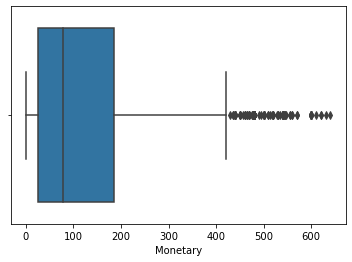

In [99]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==4]['Monetary'])

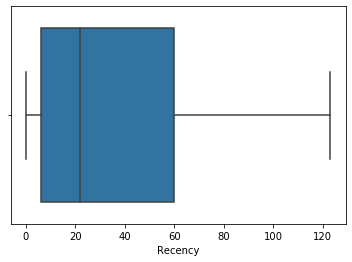

In [100]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==4]['Recency'])

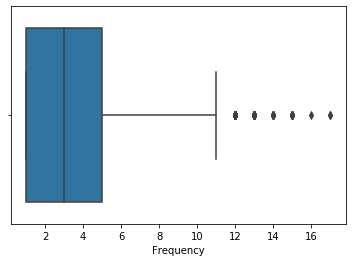

In [101]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==4]['Frequency'])

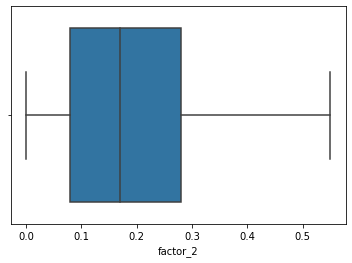

In [102]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==4]['factor_2'])

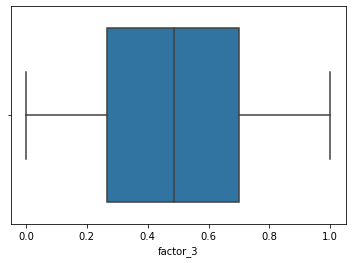

In [103]:
rf_boxplot = sns.boxplot(x=segment[y_kmeans==4]['factor_3'])

## "Объем" кластеров

<BarContainer object of 5 artists>

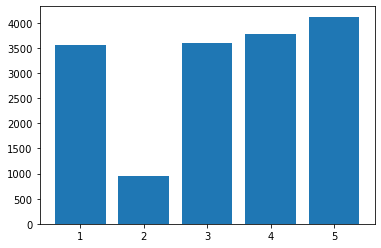

In [107]:
plt.bar([1,2,3,4,5],[len(segment[y_kmeans==0]), len(segment[y_kmeans==1]),
              len(segment[y_kmeans==2]), len(segment[y_kmeans==3]), len(segment[y_kmeans==4])])